In [1]:
# pip install pmlb --upgrade

Load the Data

In [2]:
from pmlb import fetch_data
import pandas as pd

pollen_data = fetch_data('529_pollen') # load_data
pollen_df = pollen_data.drop(columns=['target']) # remove the labels' column
labels = pollen_data.target

print(pollen_data.shape)

(3848, 5)


Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

Analyze Data

In [4]:
print(f"Number of samples: {pollen_df.shape[0]}")
print(f"Number of features: {pollen_df.shape[1]}\n")
summary_stats = pollen_df.describe()
min_max = summary_stats.loc[['min', 'max']] # get min and max for each feature
# range of each feature
print("Features' range:")
for feature in pollen_df.columns:
    print(f'{feature}: {min_max.loc["min", feature]} - {min_max.loc["max", feature]}')

print("\nFeatures' STD:")
print(pollen_df.std())
print("\nFeatures' Variance:")
print(pollen_df.var())

Number of samples: 3848
Number of features: 4

Features' range:
RIDGE: -23.283899307250977 - 21.40660095214844
NUB: -16.39349937438965 - 17.25830078125
CRACK: -31.413000106811523 - 30.317800521850582
WEIGHT: -34.03519821166992 - 35.80279922485352

Features' STD:
RIDGE      6.398237
NUB        5.186311
CRACK      7.875199
WEIGHT    10.043092
dtype: float64

Features' Variance:
RIDGE      40.937431
NUB        26.897817
CRACK      62.018757
WEIGHT    100.863690
dtype: float64


In [5]:
def train_and_predict(df, labels):
    ratios = np.arange(0.1, 1, 0.1) # different ratios
    result = []
    for ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=ratio) # split the data into train and test
        
        lr = LinearRegression() 
        lr.fit(X_train, y_train) # train the model
    
        predicted = lr.predict(X_test) # predict the labels
        
        mse = mean_squared_error(y_pred=predicted, y_true=y_test)
        result.append(mse)
    
    plt.plot(ratios, result)
    plt.xlabel('Test Ratio')
    plt.ylabel('Mean Square Error')
    plt.title('Results')
    plt.show()

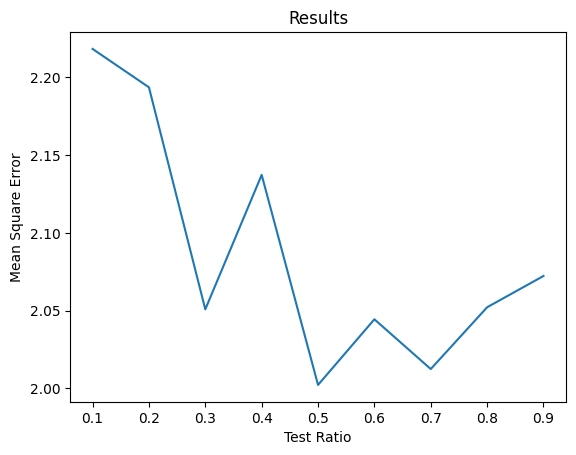

In [7]:
train_and_predict(pollen_df, labels)

In [8]:
def k_features(df, labels, k, r):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=r) # split the data
    best_mse = float('inf')
    best_features = None
    for features in combinations(range(X_train.shape[1]), k): # create all possible combinations
        x_train_k = X_train.iloc[:, list(features)] # use the selected features
        x_test_k = X_test.iloc[:, list(features)]
        
        lr = LinearRegression() 
        lr.fit(x_train_k, y_train) # train the model
        
        predicted = lr.predict(x_test_k)
        mse = mean_squared_error(y_pred=predicted, y_true=y_test)
        if mse < best_mse: # check best results
            best_mse = mse
            best_features = features
    return best_mse, best_features

k-naive features

In [9]:
for k in range(2, 4): # check for k=2 and k=3
    results = k_features(pollen_df, labels, k, 0.1)
    print(f'k = {k}:')
    print(f'Best MSE: {results[0]}')
    print("Best Features: ", end="")
    for index in results[1]:
        print(pollen_df.columns[index], end=" ")
    print()

k = 2:
Best MSE: 3.138398400225369
Best Features: RIDGE WEIGHT 
k = 3:
Best MSE: 2.138897868251319
Best Features: RIDGE NUB WEIGHT 
